<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 180.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 88.8 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
print("Column Names and Data Types:")
print(df.dtypes)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Column Names and Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Dataset Shape: 65437 rows × 114 columns


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_counts, 'Percent Missing': missing_percent.round(2)})
print("\nMissing Values Summary:")
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))


Missing Values Summary:
                            Missing Values  Percent Missing
AINextMuch less integrated           64289            98.25
AINextLess integrated                63082            96.40
AINextNo change                      52939            80.90
AINextMuch more integrated           51999            79.46
EmbeddedAdmired                      48704            74.43
...                                    ...              ...
YearsCode                             5568             8.51
NEWSOSites                            5151             7.87
LearnCode                             4949             7.56
EdLevel                               4653             7.11
AISelect                              4530             6.92

[109 rows x 2 columns]


In [5]:
df.dropna(thresh=len(df)*0.1, axis=1, inplace=True)

In [6]:
df_clean = df.dropna(subset=['Employment', 'JobSat', 'YearsCodePro', 'EdLevel'])
df['LearnCode'].fillna('Unknown', inplace=True)
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

/tmp/ipykernel_543/796349904.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LearnCode'].fillna('Unknown', inplace=True)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [7]:
key_columns = ['Employment', 'JobSat', 'YearsCodePro']
print("\nValue Counts for Key Columns:\n")

for col in key_columns:
    print(f"---{col}---")
    print(df[col].value_counts(dropna=False).head(10))
    print("-" * 40)



Value Counts for Key Columns:

---Employment---
Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Employed, part-time                                                          1266
Student, full-time;Employed, part-time                                       1115
Employed, full-time;Student, full-time                                        897
Employed, full-time;Student, part-time                                        839
Student, full-time;Not employed, but looking for work                         686
Name: count, dtype: int64
----------------------------------------
---JobSat---
JobSat
NaN     36311
8.0      7509
7.0  

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.df_jobsat = df['JobSat'].dropna()


/tmp/ipykernel_543/1202577595.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_jobsat, shade=True, color='skyblue')


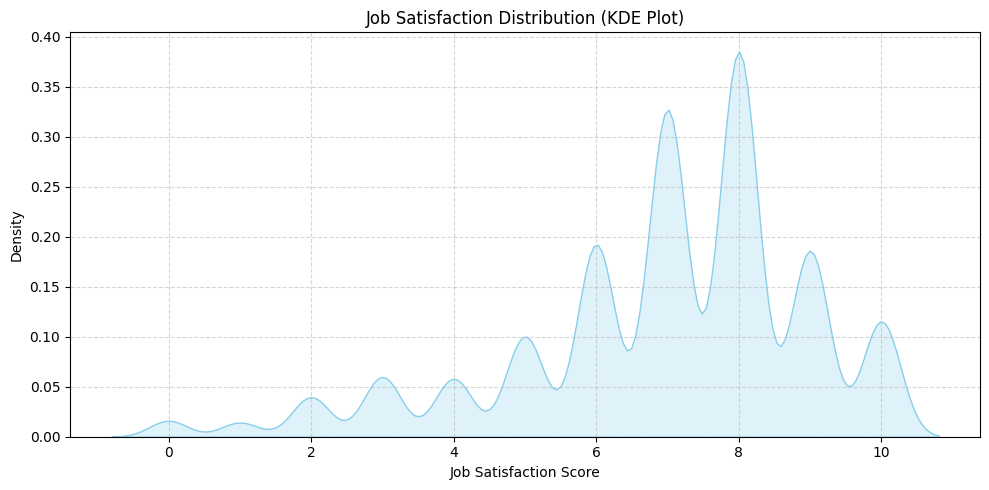

In [23]:
df_jobsat = df['JobSat'].dropna()
plt.figure(figsize=(10, 5))
sns.kdeplot(df_jobsat, shade=True, color='skyblue')
plt.title('Job Satisfaction Distribution (KDE Plot)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [9]:
df_lang = df[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].dropna()
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang['LanguageWantToWorkWith'] = df_lang['LanguageWantToWorkWith'].str.split(';')
have_df = df_lang.explode('LanguageHaveWorkedWith')
want_df = df_lang.explode('LanguageWantToWorkWith')
have_df = have_df[['LanguageHaveWorkedWith']].rename(columns={'LanguageHaveWorkedWith': 'Language'})
want_df = want_df[['LanguageWantToWorkWith']].rename(columns={'LanguageWantToWorkWith': 'Language'})
have_counts = have_df['Language'].value_counts()
want_counts = want_df['Language'].value_counts()
lang_comparison = pd.DataFrame({
    'Used': have_counts,
    'Wanted': want_counts
}).fillna(0)
lang_comparison['Total'] = lang_comparison['Used'] + lang_comparison['Wanted']
lang_comparison = lang_comparison.sort_values(by='Total', ascending=False).drop('Total', axis=1)
lang_comparison

,Used,Wanted
Language,,
JavaScript,34915,23774
Python,28952,25047
SQL,28697,22400
HTML/CSS,29762,20721
TypeScript,21759,20239
Bash/Shell (all shells),19390,13744
C#,15163,12921
Java,16987,10668
Rust,7317,17232


### Step 7: Analyze Remote Work Trends


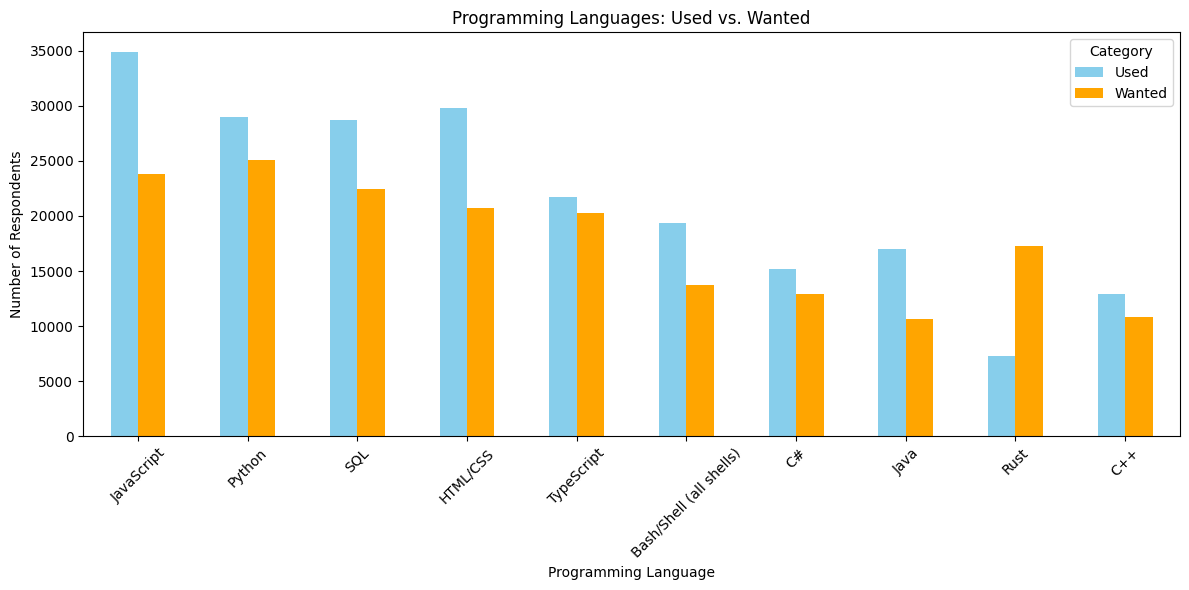

In [10]:
top_langs = lang_comparison.head(10)
top_langs.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Programming Languages: Used vs. Wanted')
plt.ylabel('Number of Respondents')
plt.xlabel('Programming Language')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


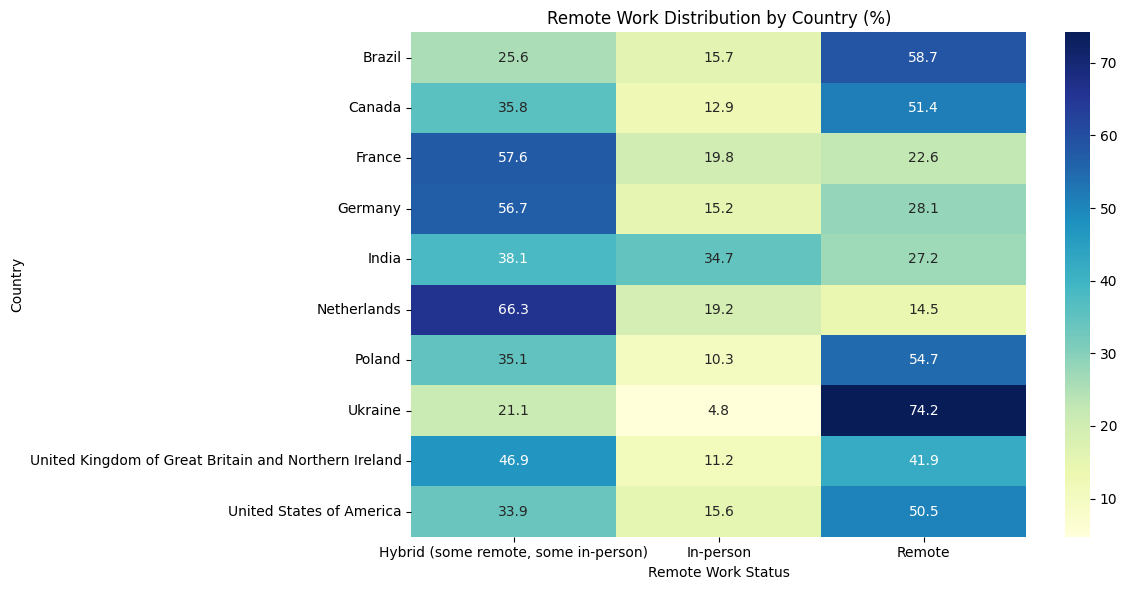

In [11]:
df_remote = df[['Country', 'RemoteWork']].dropna()
top_countries = df_remote['Country'].value_counts().head(10).index
df_top = df_remote[df_remote['Country'].isin(top_countries)]
remote_by_country = pd.crosstab(df_top['Country'], df_top['RemoteWork'], normalize='index') * 100
plt.figure(figsize=(12, 6))
sns.heatmap(remote_by_country, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Remote Work Distribution by Country (%)')
plt.xlabel('Remote Work Status')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [16]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 171.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
from scipy.stats import pearsonr, spearmanr
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df_corr = df[['YearsCodePro', 'JobSat']].dropna()
pearson_corr, pearson_p = pearsonr(df_corr['YearsCodePro'], df_corr['JobSat'])
print(f" Pearson Correlation: {pearson_corr:.3f} (p-value = {pearson_p:.4f})")
spearman_corr, spearman_p = spearmanr(df_corr['YearsCodePro'], df_corr['JobSat'])
print(f" Spearman Correlation: {spearman_corr:.3f} (p-value = {spearman_p:.4f})")


 Pearson Correlation: 0.103 (p-value = 0.0000)
 Spearman Correlation: 0.121 (p-value = 0.0000)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_543/4238266511.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


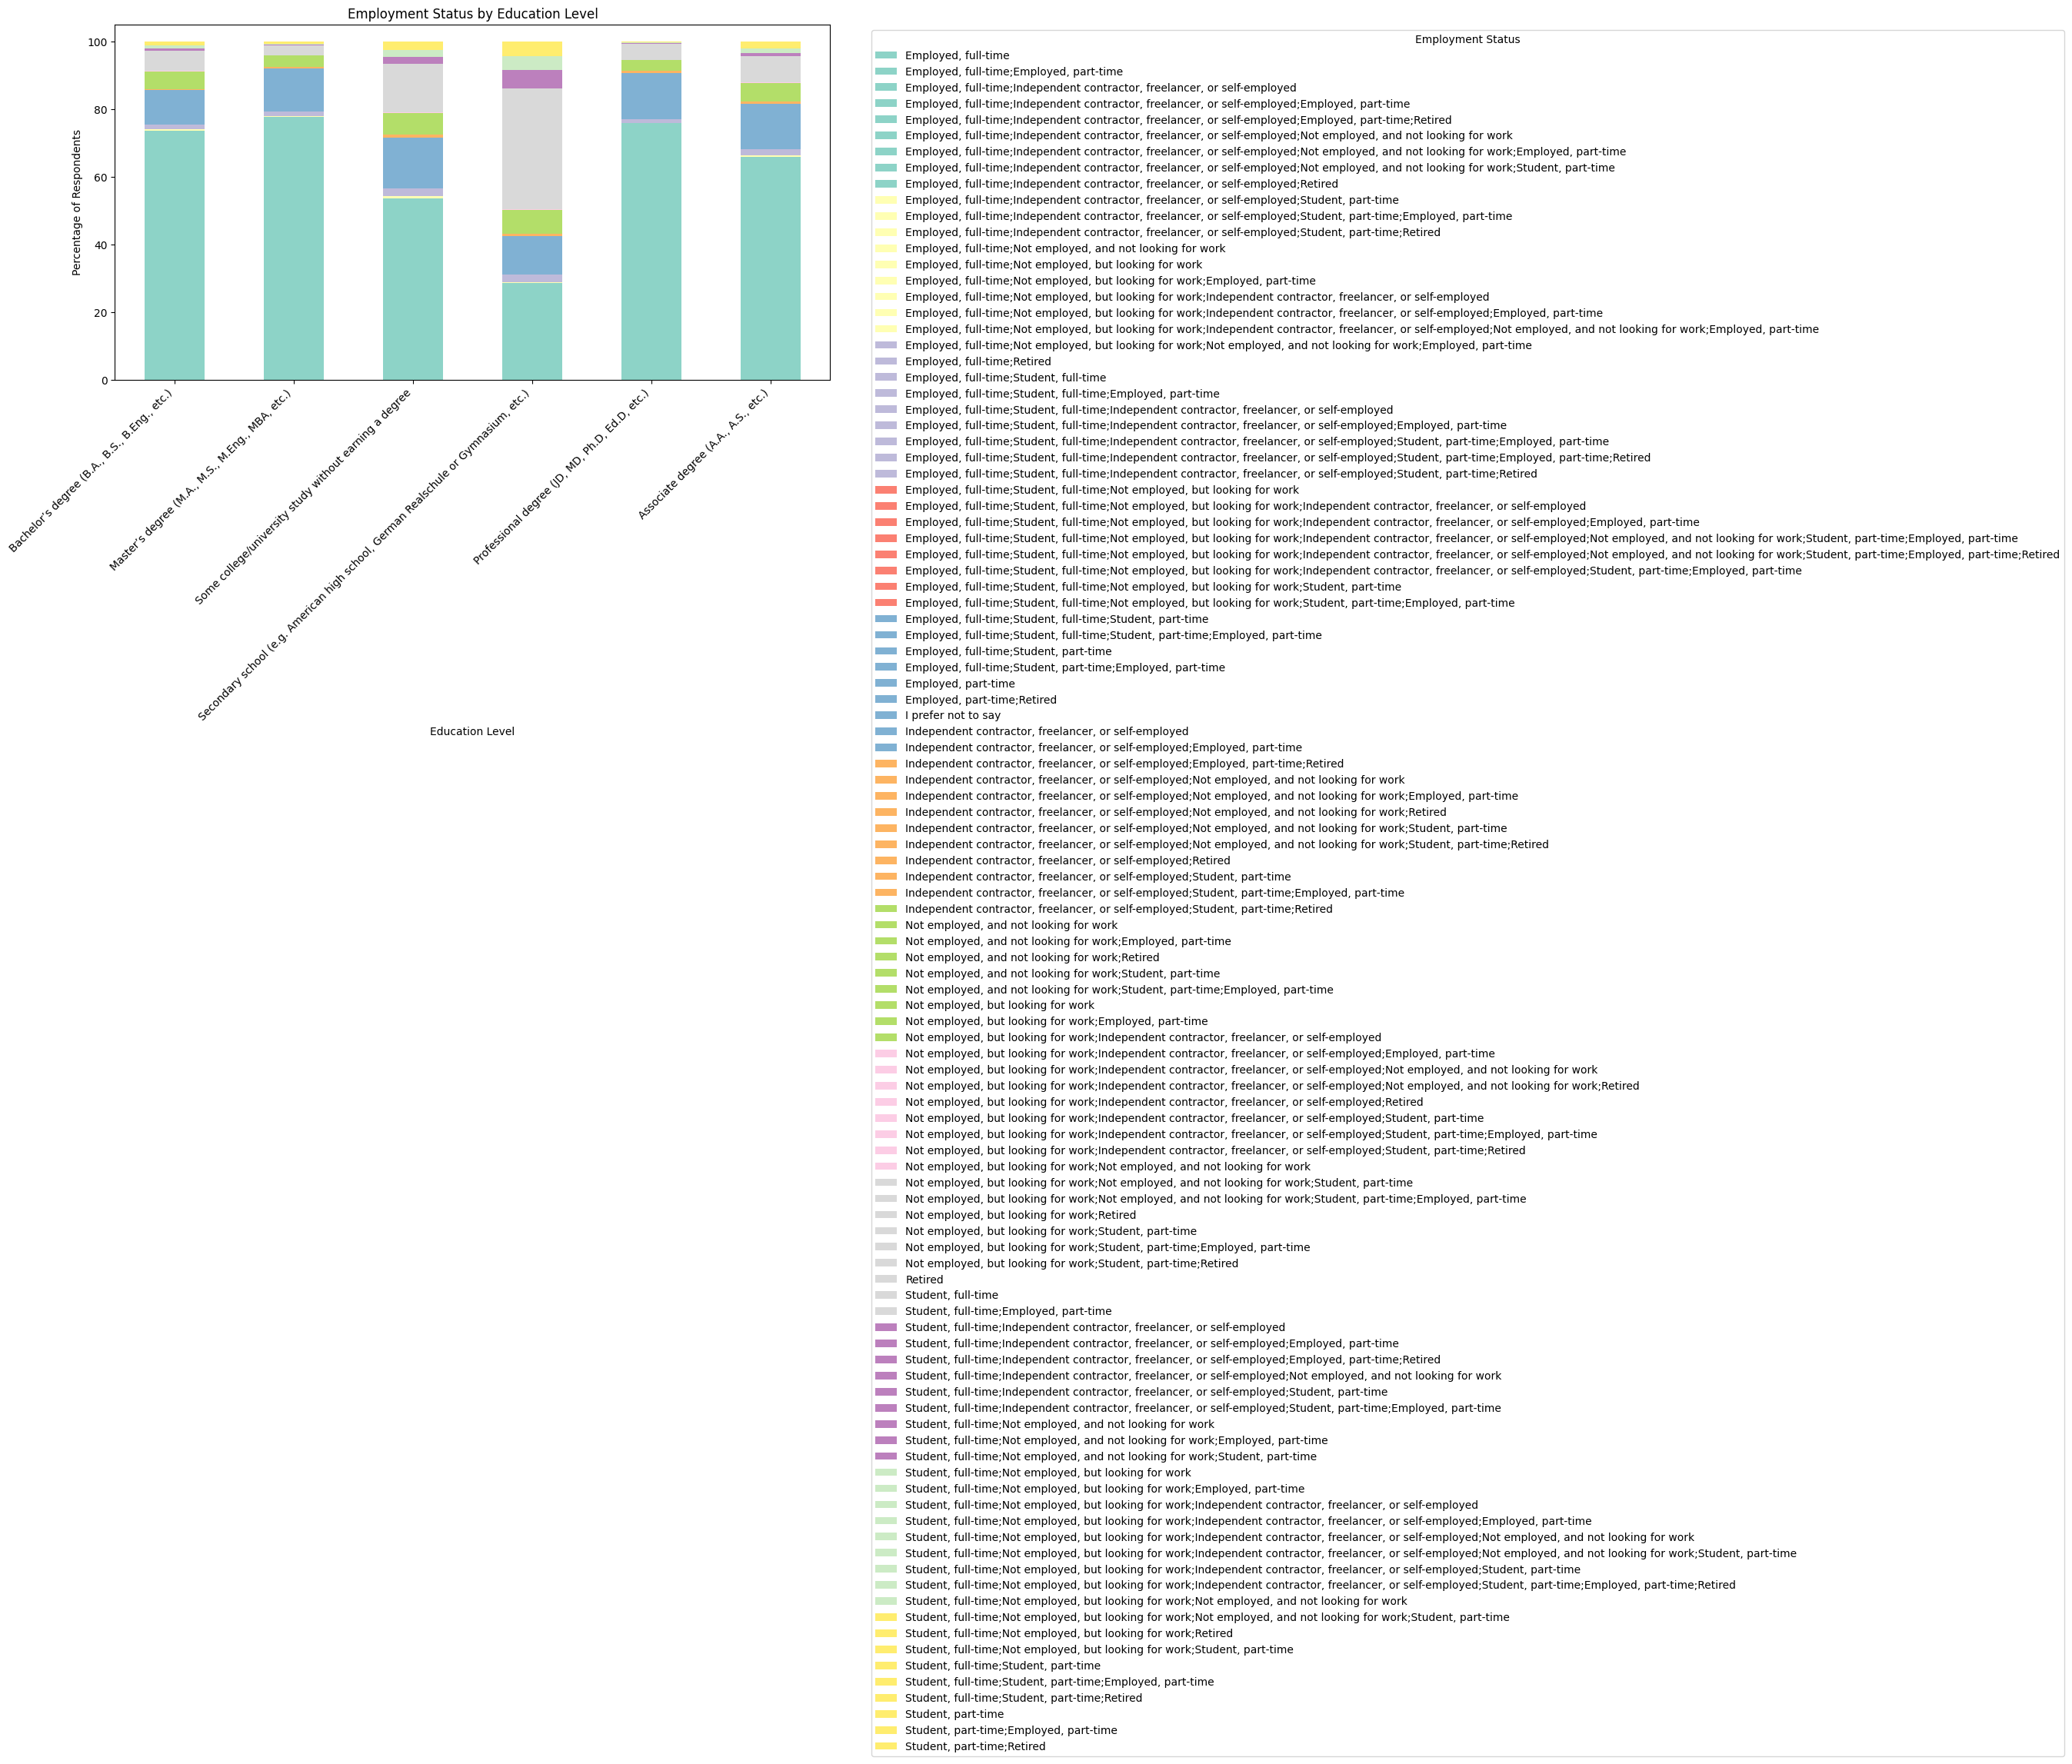

In [18]:
df_emp_edu = df[['Employment', 'EdLevel']].dropna()
cross_tab_norm = pd.crosstab(df_emp_edu['EdLevel'], df_emp_edu['Employment'], normalize='index') * 100
top_ed_levels = df_emp_edu['EdLevel'].value_counts().head(6).index
cross_tab_plot = cross_tab_norm.loc[top_ed_levels]
cross_tab_plot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [24]:
df_clean.to_csv('cleaned_dataset.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
